In [189]:
%pip install --upgrade plotly pandas numpy seaborn matplotlib nbformat scikit-learn

You should consider upgrading via the '/Users/jnibbs/.pyenv/versions/3.10.5/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [190]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [191]:
pd.options.display.float_format = '{:,.2f}'.format

In [192]:
stock = pd.read_csv('MSFT.csv')

## Dataset on the ticker FUN 
---

In [193]:
print(stock.shape)
print(f'Any NaN: {stock.isna().any().all()}')
print(f'Any Duplicates: {stock.duplicated().any()}')
stock.info()

(8584, 7)
Any NaN: False
Any Duplicates: False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8584 entries, 0 to 8583
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8584 non-null   object 
 1   Open       8584 non-null   float64
 2   High       8584 non-null   float64
 3   Low        8584 non-null   float64
 4   Close      8584 non-null   float64
 5   Adj Close  8584 non-null   float64
 6   Volume     8584 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 469.6+ KB


In [194]:
stock['Date'] = pd.to_datetime(stock['Date'])

In [195]:
stock[:2]

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.09,0.10,0.09,0.10,0.06,1031788800
1,1986-03-14,0.10,0.10,0.10,0.10,0.06,308160000


In [196]:
stock.sort_values('Date', ascending=False)

,Date,Open,High,Low,Close,Adj Close,Volume
8583,2020-04-01,153.00,157.75,150.82,152.11,152.11,57858300
8582,2020-03-31,159.40,164.78,156.56,157.71,157.71,77927200
8581,2020-03-30,152.44,160.60,150.01,160.23,160.23,63420300
8580,2020-03-27,151.75,154.89,149.20,149.70,149.70,57042300
8579,2020-03-26,148.40,156.66,148.37,156.11,156.11,64568100
...,...,...,...,...,...,...,...
4,1986-03-19,0.10,0.10,0.10,0.10,0.06,47894400
3,1986-03-18,0.10,0.10,0.10,0.10,0.06,67766400
2,1986-03-17,0.10,0.10,0.10,0.10,0.07,133171200
1,1986-03-14,0.10,0.10,0.10,0.10,0.06,308160000


In [197]:
newer_stuff = stock.query('Date >= "2019-04-10"')
newer_stuff[:2]

,Date,Open,High,Low,Close,Adj Close,Volume
8337,2019-04-10,119.76,120.35,119.54,120.19,118.62,16477200
8338,2019-04-11,120.54,120.85,119.92,120.33,118.76,14209100


### Train the model

In [198]:
target = newer_stuff['High']
features = newer_stuff.drop(['High', 'Date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=10)

In [199]:
regr = LinearRegression()
regr.fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)
print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 1.0


In [200]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
Open,0.43
Low,0.15
Close,-0.14
Adj Close,0.54
Volume,0.00


In [201]:
predicted_vals = regr.predict(X_train)
residuals = (y_train - predicted_vals)

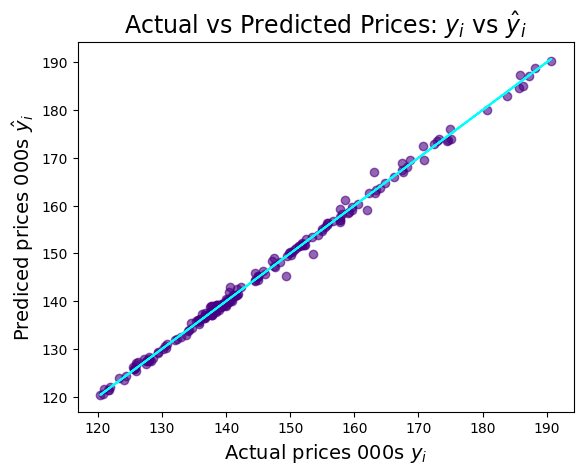

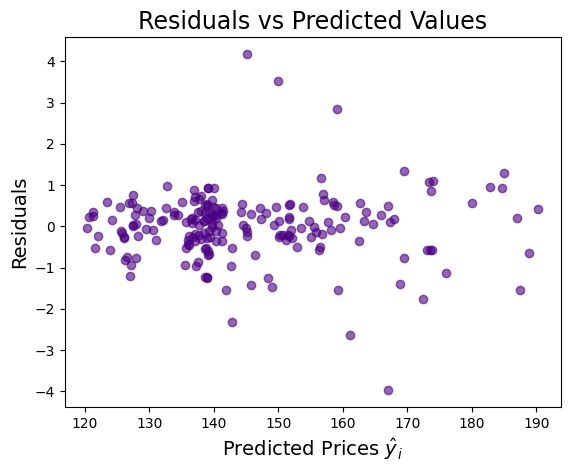

In [202]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

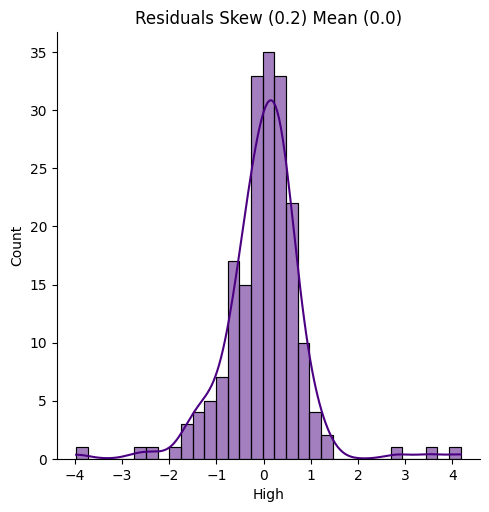

In [203]:
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

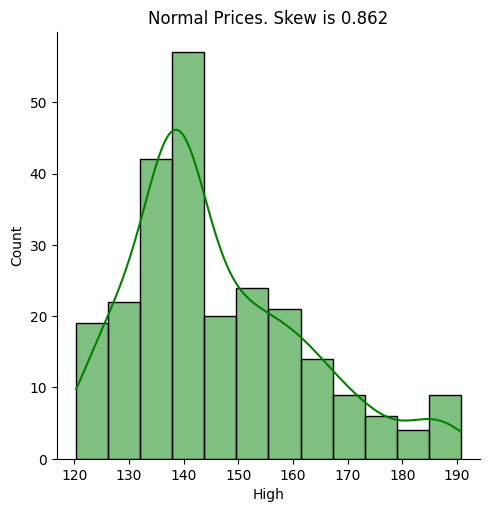

In [204]:
tgt_skew = newer_stuff['High'].skew()
sns.displot(newer_stuff['High'], kde='kde', color='green')
plt.title(f'Normal Prices. Skew is {tgt_skew:.3}')
plt.show()

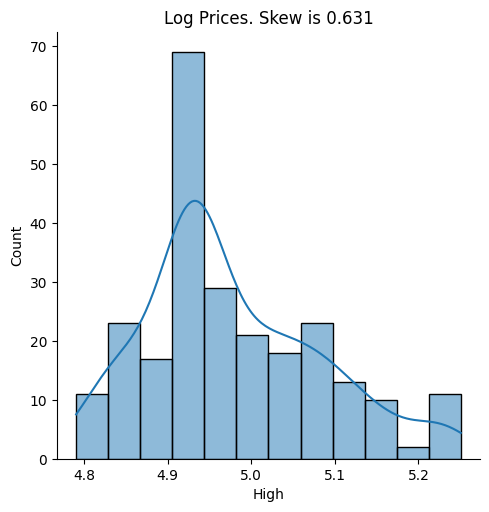

In [205]:
y_log = np.log(newer_stuff['High'])
sns.displot(y_log, kde=True)
plt.title(f'Log Prices. Skew is {y_log.skew():.3}')
plt.show()

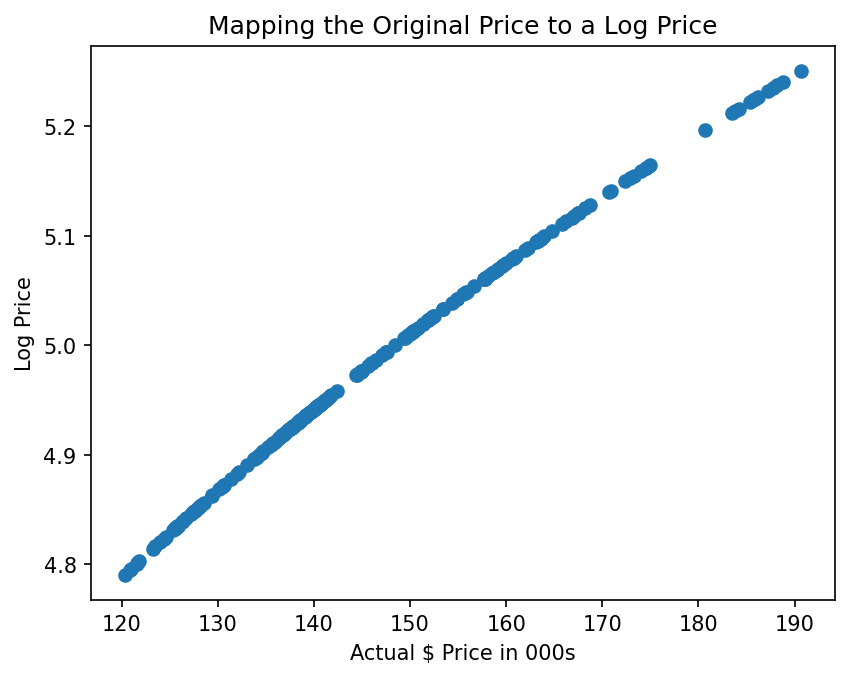

In [206]:
plt.figure(dpi=150)
plt.scatter(newer_stuff.High, np.log(newer_stuff.High))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

In [207]:
new_target = np.log(newer_stuff['High']) # Use log prices
features = newer_stuff.drop(['High', 'Date'], axis=1)

X_train, X_test, log_y_train, log_y_test = train_test_split(features, 
                                                    new_target, 
                                                    test_size=0.2, 
                                                    random_state=10)

log_regr = LinearRegression()
log_regr.fit(X_train, log_y_train)
log_rsquared = log_regr.score(X_train, log_y_train)

log_predictions = log_regr.predict(X_train)
log_residuals = (log_y_train - log_predictions)

print(f'Training data r-squared: {log_rsquared:.2}')

Training data r-squared: 0.99


In [208]:
print(f'Original Model Test Data r-squared: {regr.score(X_test, y_test):.2}')
print(f'Log Model Test Data r-squared: {log_regr.score(X_test, log_y_test):.2}')

Original Model Test Data r-squared: 1.0
Log Model Test Data r-squared: 1.0


In [209]:
# Starting Point: Average Values in the Dataset
features = newer_stuff.drop(['High', 'Date'], axis=1)
average_vals = features.mean().values
random_day = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
random_day

,Open,Low,Close,Adj Close,Volume
0,144.54,143.01,144.58,143.76,"29,986,671.66"


In [210]:
tester_stock_df_full = pd.read_csv('MSFT_test.csv')
tester_stock_df = tester_stock_df_full.drop(['High', 'Date'], axis=1)
tester_stock_df['Volume'] = tester_stock_df['Volume'].astype(str).str.replace(',', '').astype(float)
tester_stock_df

,Open,Low,Close,Adj Close,Volume
0,372.54,367.24,375.39,375.39,"35,037,136.00"
1,388.08,376.93,378.80,378.80,"21,613,100.00"
2,390.13,387.40,390.58,390.58,"13,766,800.00"
3,395.00,388.57,389.97,389.97,"16,108,400.00"
4,393.92,392.64,395.16,395.16,"15,775,000.00"
5,395.40,389.81,393.08,393.08,"21,004,500.00"
6,383.22,382.80,391.26,391.26,"39,675,900.00"
7,385.74,383.28,386.84,386.84,"18,470,500.00"
8,385.53,384.00,387.82,387.82,"19,185,500.00"
9,387.07,381.10,383.52,383.52,"19,486,900.00"


#### Real Test
---

In [211]:
first_guess = regr.predict(tester_stock_df)[0]
real_high = tester_stock_df_full['High'][0]
print(f'The guess for the high of the day for the FUN stock is ${first_guess:.4}')
print(f'The real high was ${real_high} a difference in ${first_guess - real_high:.2}')
print(f'A difference of {((first_guess - real_high) / real_high) * 100:.3}%')

The guess for the high of the day for the FUN stock is $371.1
The real high was $377.06 a difference in $-5.9
A difference of -1.58%


In [212]:
first_guess = regr.predict(tester_stock_df)[1]
real_high = tester_stock_df_full['High'][1]
print(f'The guess for the high of the day for the FUN stock is ${first_guess:.4}')
print(f'The real high was ${real_high} a difference in ${first_guess - real_high:.2}')
print(f'A difference of {((first_guess - real_high) / real_high) * 100:.3}%')

The guess for the high of the day for the FUN stock is $379.4
The real high was $389.13 a difference in $-9.8
A difference of -2.51%


In [213]:
first_guess = regr.predict(tester_stock_df)[2]
real_high = tester_stock_df_full['High'][2]
print(f'The guess for the high of the day for the FUN stock is ${first_guess:.4}')
print(f'The real high was ${real_high} a difference in ${first_guess - real_high:.3}')
print(f'A difference of {((first_guess - real_high) / real_high) * 100:.3}%')

The guess for the high of the day for the FUN stock is $385.8
The real high was $392.24 a difference in $-6.46
A difference of -1.65%


In [214]:
first_guess = regr.predict(tester_stock_df)[3]
real_high = tester_stock_df_full['High'][3]
print(f'The guess for the high of the day for the FUN stock is ${first_guess:.4}')
print(f'The real high was ${real_high} a difference in ${first_guess - real_high:.2}')
print(f'A difference of {((first_guess - real_high) / real_high) * 100:.3}%')

The guess for the high of the day for the FUN stock is $388.0
The real high was $395.31 a difference in $-7.3
A difference of -1.84%


In [215]:
first_guess = regr.predict(tester_stock_df)[4]
real_high = tester_stock_df_full['High'][4]
print(f'The guess for the high of the day for the FUN stock is ${first_guess:.4}')
print(f'The real high was ${real_high} a difference in ${first_guess - real_high:.2}')
print(f'A difference of {((first_guess - real_high) / real_high) * 100:.3}%')

The guess for the high of the day for the FUN stock is $390.2
The real high was $396.36 a difference in $-6.1
A difference of -1.55%


In [216]:
first_guess = regr.predict(tester_stock_df)[5]
real_high = tester_stock_df_full['High'][5]
print(f'The guess for the high of the day for the FUN stock is ${first_guess:.4}')
print(f'The real high was ${real_high} a difference in ${first_guess - real_high:.2}')
print(f'A difference of {((first_guess - real_high) / real_high) * 100:.3}%')

The guess for the high of the day for the FUN stock is $390.1
The real high was $395.4 a difference in $-5.3
A difference of -1.34%


In [217]:
first_guess = regr.predict(tester_stock_df)[6]
real_high = tester_stock_df_full['High'][6]
print(f'The guess for the high of the day for the FUN stock is ${first_guess:.4}')
print(f'The real high was ${real_high} a difference in ${first_guess - real_high:.2}')
print(f'A difference of {((first_guess - real_high) / real_high) * 100:.3}%')

The guess for the high of the day for the FUN stock is $384.8
The real high was $391.74 a difference in $-6.9
A difference of -1.76%


In [218]:
first_guess = regr.predict(tester_stock_df)[7]
real_high = tester_stock_df_full['High'][7]
print(f'The guess for the high of the day for the FUN stock is ${first_guess:.4}')
print(f'The real high was ${real_high} a difference in ${first_guess - real_high:.2}')
print(f'A difference of {((first_guess - real_high) / real_high) * 100:.3}%')

The guess for the high of the day for the FUN stock is $382.2
The real high was $391.79 a difference in $-9.6
A difference of -2.44%


In [219]:
first_guess = regr.predict(tester_stock_df)[8]
real_high = tester_stock_df_full['High'][8]
print(f'The guess for the high of the day for the FUN stock is ${first_guess:.4}')
print(f'The real high was ${real_high} a difference in ${first_guess - real_high:.2}')
print(f'A difference of {((first_guess - real_high) / real_high) * 100:.3}%')

The guess for the high of the day for the FUN stock is $382.7
The real high was $389.68 a difference in $-7.0
A difference of -1.79%


In [220]:
first_guess = regr.predict(tester_stock_df)[9]
real_high = tester_stock_df_full['High'][9]
print(f'The guess for the high of the day for the FUN stock is ${first_guess:.4}')
print(f'The real high was ${real_high} a difference in ${first_guess - real_high:.2}')
print(f'A difference of {((first_guess - real_high) / real_high) * 100:.3}%')

The guess for the high of the day for the FUN stock is $381.2
The real high was $387.37 a difference in $-6.1
A difference of -1.58%


### Conclusion
---

With this model I can predict a number that if crossed something is up and action should be taken. The farthest accuracy with the 10 day data set to test with was 4.77% off from the real world daily high of the stock Six Flags Entertainment Corporation (FUN). 

Things to make the model more accurate
* The data set that the model was trained on was old data the newest date was 2020-04-01. While the final testing dates were from Mar 31, 2025 and 10 days before.